# <center>Lifestyle Project - Machine Learning (start2impact University)</center>

<img src="https://s.abcnews.com/images/Health/diabetes-gty-er-181118_hpMain_16x9_992.jpg" />

## Table of Contents:
* [1. Introduzione](#first-bullet)
* [2. Exploratory Data Analysis](#second-bullet)
* [3. Machine Learning con SVR](#third-bullet)
* [4. Conclusioni (grafiche)](#fourth-bullet)

## 1. Introduzione <a class="anchor" id="first-bullet"></a>

Il progetto consiste nell'addestrare un singolo modello di apprendimento (a mia scelta, basta che abbia almeno un iperparametro da validare) e di valutare la sua performance. Usando il toy dataset di Sklearn "Diabetes" dovrò predire il livello di progressione della malattia dopo un anno, a partire da 10 variabili misurate sui pazienti.

### 1.1. Import librerie

In [57]:
#Importo le librerie che mi servono
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from plotly.offline import plot
from copy import deepcopy
import plotly.express as px

### 1.2. Import dataset

In [58]:
#Importo il dataset 'Diabetes' direttamente da Scikit-Learn
diabetes = datasets.load_diabetes()
#Analizzo la descrizione del dataset
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Dalla descrizione del dataset possiamo notare che il dataset possiede 11 colonne, le prime 10 sono le feature, quindi le caratteristiche dei pazienti, l'ultima che vogliamo predirre, il "Target", è una variabile quantitativa di progressione della malattia un anno dopo dai riferimenti presi.
Possiamo anche leggere che le features sono già standardizzate quindi non necessitano scaling.

## 2. Exploratory Data Analysis <a class="anchor" id="second-bullet"></a>

In [59]:
#Creo un Dataframe Pandas per avere una migliore visualizzazione dei dati
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df = pd.concat([df, pd.DataFrame(diabetes.target)], axis=1).rename(columns={0: "target"})
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


Questo è quindi il nostro Dataframe, con 442 righe e 11 colonne.

In [60]:
#Controllo le info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


Dalle info noto che tutte le colonne sono tipo 'float64' e che nessuna colonna ha elementi nulli perchè i valori non nulli corrispondono al numero delle righe. Il dataset è molto semplice e non richiede particolari manipolazioni di dati.

In [61]:
#Controllo eventuali righe uguali che sarebbero inutili
df.duplicated().sum()

0

Nessuna riga uguale.

In [62]:
#Analizzo statistiche descrittive
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


Il "describe" non ci dice cose particolari nelle varie statistiche, un dato interessante può essere guardare il valore da predirre che va da 25 a 346 con una media di 152.

Text(0.5, 1.0, 'Distribution of target')

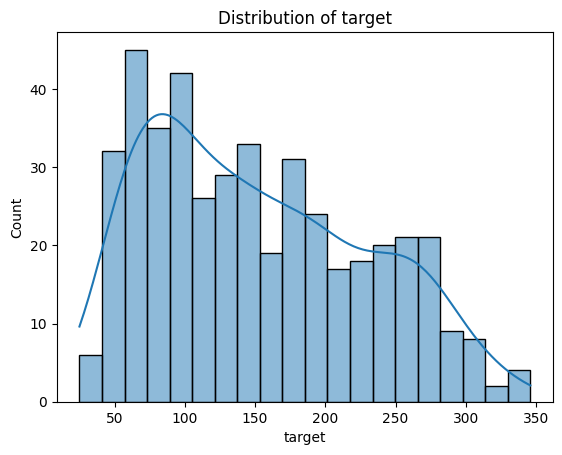

In [63]:
#Mostro la "distribuzione" di "target"
sns.histplot(data=df , x='target' , bins=20 , kde=True)
plt.title('Distribution of target')

Vediamo quindi la distribuzione del "target", il "picco" di valori lo abbiamo tra il 60 e il 100. Abbiamo pochi valori prima del 50 e pochi dopo i 270 che saranno quindi più difficili da prevedere.

In [64]:
#Divido i dati, sulla X ho solo le features, sulla y solo il target
X = df.drop(['target'],axis=1).values
y = df['target'].values

#Divido in dati di train e dati di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((309, 10), (133, 10), (309,), (133,))

In [65]:
#Unisco i soli dati di train e i soli dati di test per crearne dei Dataframe in modo da poter lavorare solo sul train

Xy = np.hstack((X_train,y_train.reshape(-1,1)))
dftrain = pd.DataFrame(Xy,columns=df.columns)

Xy = np.hstack((X_test,y_test.reshape(-1,1)))
dftest = pd.DataFrame(Xy,columns=df.columns)

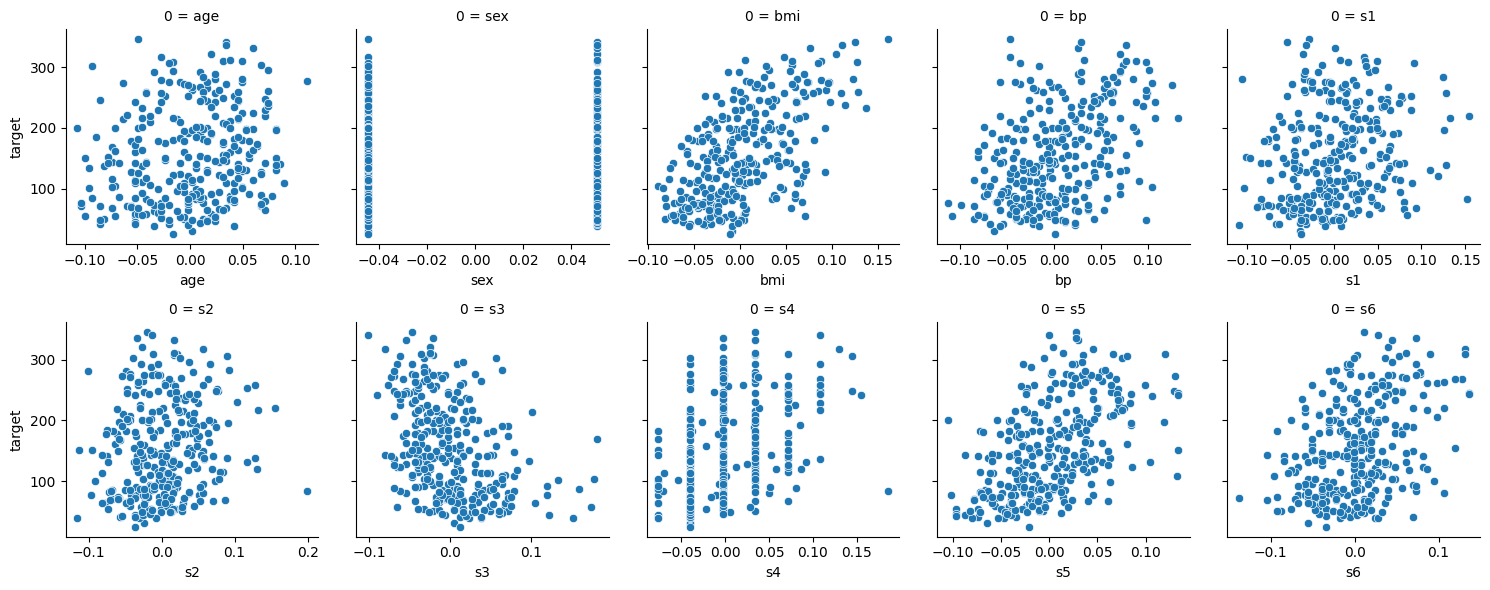

In [66]:
#Plotto graficamente le possibili correlazioni tra il target e tutte le altre features
cols= dftrain.columns[:-1].tolist()

g = sns.FacetGrid(pd.DataFrame(cols), col=0,col_wrap=5, sharex=False)

for ax, varx in zip(g.axes, cols):
    sns.scatterplot(data=dftrain, x=varx, y="target", ax=ax)
    
g.tight_layout()

Dando un'occhiata ai grafici possiamo farci una prima idea delle possibili correlazioni delle features con il target, quelle più correlate sembrano 'bmi' e 'bp', una che invece sembra incidere poco è 'sex'.

In [67]:
#Trovo e ordino tutte le correlazioni tra le features e il target

corr_target = (abs(df.corr()['target']))
corr_list=[]
for i,c in zip(corr_target,dftrain.columns):
    corr_list+=[tuple((i,c))]
    
corr_list = sorted(corr_list,reverse=True)
print(corr_list)

[(1.0, 'target'), (0.5864501344746885, 'bmi'), (0.5658825924427434, 's5'), (0.44148175856257105, 'bp'), (0.43045288474477283, 's4'), (0.39478925067091836, 's3'), (0.3824834842485807, 's6'), (0.21202248101455062, 's1'), (0.1878887507189197, 'age'), (0.1740535869687425, 's2'), (0.043061998451605396, 'sex')]


Trovato e ordinato le correlazioni tra 'target' e tutte le features, come previsto la più correlata è 'bmi', quella meno correlata è 'sex', comunque le teniamo tutte perchè faremo una selezione delle features per importanza all'interno della Pipeline.

In [68]:
#Creo la lista dei nomi delle features senza 'target'
features = [corr[1] for corr in corr_list]
features = features[1:]

## 3. Machine Learning con SVR  <a class="anchor" id="third-bullet"></a>

In [69]:
#Creo questo ciclo "for" che mi restituisce le migliori feature da usare in base al miglior neg_mean_squared_error ottenuto
#Applicando 5 cross validation sulle varie combinazioni di iperparametri inseriti tramite GridSearchCV ottengo il "best_svr"
curr_features = []
best_features = []
best_svr = None
best_neg_mse = float('-inf')
for feature in features:
    curr_features.append(feature)
    X_train = dftrain[curr_features].values
    y_train = dftrain['target'].values
    svr = SVR()
    #Provo diverse combinazioni di kernel e parametri
    svr_params = [
            {"kernel": ["linear"], "C": [0.01, 0.1, 1, 10, 100]},
            {"kernel": ["rbf"], "C": [0.01, 0.1, 1, 10, 100], "gamma": [0.01, 0.1, 1,10, 100]},
            {"kernel": ["poly"], "C": [0.01, 0.1, 1, 10, 100], "degree": np.arange(1,5,1)}
          ]
    cv_svr = GridSearchCV(estimator=svr, param_grid=svr_params, cv= 5,scoring='neg_mean_squared_error',)
    cv_svr.fit(X_train, y_train)
    if best_neg_mse < cv_svr.best_score_:
        best_neg_mse = cv_svr.best_score_
        best_svr=deepcopy(cv_svr.best_estimator_)
        best_features = deepcopy(curr_features)
    print(f"Features: {curr_features}")
    print(f"Mean cross validated score of negated MSE: {cv_svr.best_score_}")
    #Creo variabili val per avere un piccolo validation test su cui calcolare l'rmse delle varie features
    _,X_val,_,y_val = train_test_split (X_train,y_train,test_size=0.3,random_state=42)
    if len(curr_features) == 1:
        X_val = X_val.reshape(-1,1)
    y_pred_val = cv_svr.best_estimator_.predict(X_val)
    rmse = MSE(y_val,y_pred_val,squared=False)
    print(f"RMSE sul validation: {rmse}")

Features: ['bmi']
Mean cross validated score of negated MSE: -4030.118491528437
RMSE sul validation: 66.28230301392935
Features: ['bmi', 's5']
Mean cross validated score of negated MSE: -3685.1486359030196
RMSE sul validation: 62.30084489322586
Features: ['bmi', 's5', 'bp']
Mean cross validated score of negated MSE: -3406.804015492825
RMSE sul validation: 57.254181517079694
Features: ['bmi', 's5', 'bp', 's4']
Mean cross validated score of negated MSE: -3448.8773811550504
RMSE sul validation: 56.947214796265214
Features: ['bmi', 's5', 'bp', 's4', 's3']
Mean cross validated score of negated MSE: -3370.130902636344
RMSE sul validation: 55.927119399958734
Features: ['bmi', 's5', 'bp', 's4', 's3', 's6']
Mean cross validated score of negated MSE: -3381.121645192435
RMSE sul validation: 56.102480049577956
Features: ['bmi', 's5', 'bp', 's4', 's3', 's6', 's1']
Mean cross validated score of negated MSE: -3356.368707580413
RMSE sul validation: 55.8204953029316
Features: ['bmi', 's5', 'bp', 's4', 

In [77]:
print(best_features)
print(best_neg_mse)
print(best_svr.get_params())

['bmi', 's5', 'bp', 's4', 's3', 's6', 's1', 'age', 's2', 'sex']
-3189.5337503366654
{'C': 100, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 10, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


Come risultato abbiamo quindi che il modello migliore comprende tutte le features e viene usato un kernel 'rbf' con i parametri sopra descritti che sul validation creato precedentemente restituisce un RMSE di 50.47.

In [78]:
#Applico il modello appena creato sul train
X_train = dftrain[best_features].values
y_train = dftrain['target'].values

y_pred_train = best_svr.predict(X_train)
rmse = MSE(y_train,y_pred_train,squared=False)
print(f"RMSE sul train: {rmse}")

RMSE sul train: 52.08609056046028


In [79]:
#Applico il modello appena creato sul test
X_test = dftest[best_features].values
y_test = dftest['target'].values

y_pred_test = best_svr.predict(X_test)
rmse = MSE(y_test,y_pred_test,squared=False)
print(f"RMSE sul test: {rmse}")

RMSE sul test: 52.395289749667924


Il fatto che i risultati su train e test siano molto simili è sintomo che il modello è stato ben applicato, purtroppo il risultato non è ottimale (più vicino allo 0 è il risultato, meglio è) ma è il migliore che ho ottenuto (ho provato anche altri modelli).

## 4. Conclusioni (grafiche) <a class="anchor" id="fourth-bullet"></a>

Mostro graficamente i risultati del mio modello.

In [81]:
df_pred = pd.DataFrame(y_test,y_pred_test,)
df_pred.reset_index(inplace=True)
df_pred.columns = ['y_pred','y_test']

fig = px.scatter(df_pred, x="y_test", y="y_pred", hover_data=["y_test", "y_pred"],title = "Actual vs Predicted")

fig.show()

Passando col mouse sui vari punti si può vedere il valore che avremmo dovuto trovare e quello invece predetto, i valori che vengono presi con precisione sono quelli che si trovano sulla diagonale partendo dall'angolo basso a sinistra.

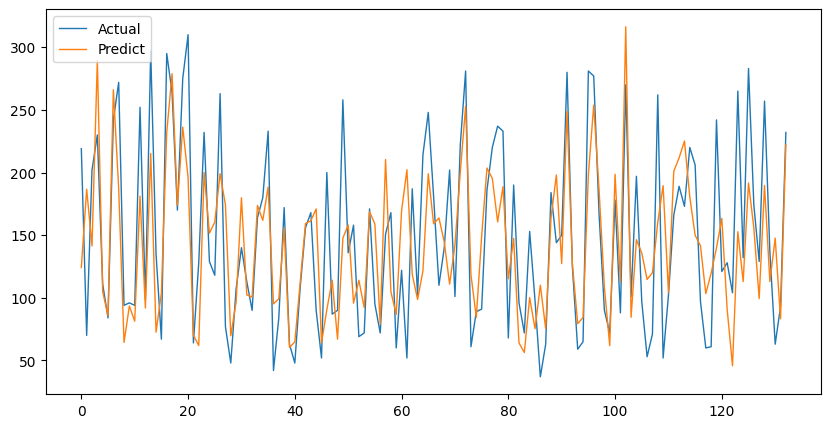

In [74]:
#Differenza tra test e predizione
plt.figure(figsize=(10,5))
plt.plot(y_test,label ='Actual',lw=1)
plt.plot(y_pred_test, label = 'Predict',lw=1)
plt.legend(loc="upper left")
plt.show()

Dal grafico si vede che la linea 'Predict' (quella arancione) in linea di massima segue la linea 'Actual' (la blu) ma non sempre è precisa quindi commette errori.

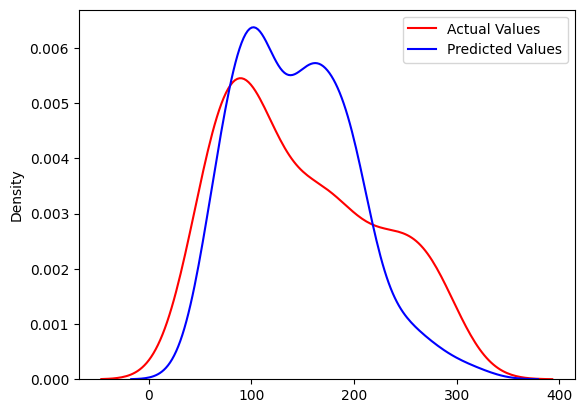

In [75]:
ax = sns.kdeplot(y_test, color="r", label="Actual Values")
sns.kdeplot(y_pred_test, color="b", label="Predicted Values", ax=ax)
ax.legend()

Dal KDE plot si vede che la funzione di densità dei valori predetti non approssima benissimo a quella dei valori reali. Scuramente il fatto di avere pochi dati a disposizione prima dei 50 e dopo i 200 incide su questa predizione.

<AxesSubplot: xlabel='y_test', ylabel='y_pred'>

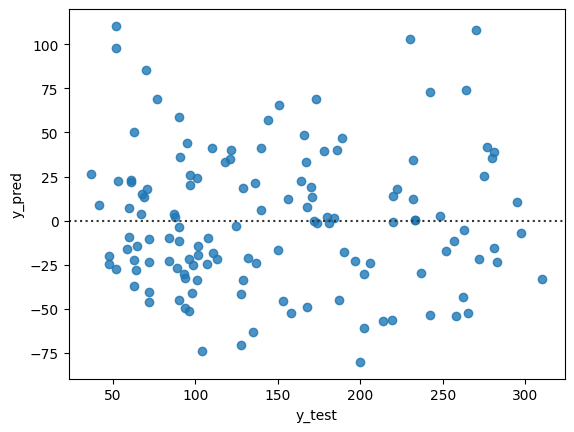

In [80]:
#Grafico residui
sns.residplot(data=df_pred,x="y_test", y="y_pred")

Osservando il grafico dei residui possiamo osservare che i punti sono distribuiti abbastanza simmetricamente e lo 0 si trova all'incirca al centro il che vuol dire che la maggior parte dei punti si trova attorno a quella riga (e questa è una buona cosa). Alcuni punti purtroppo sono distanti anche più di 100.